In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris.dropna(how='all', inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


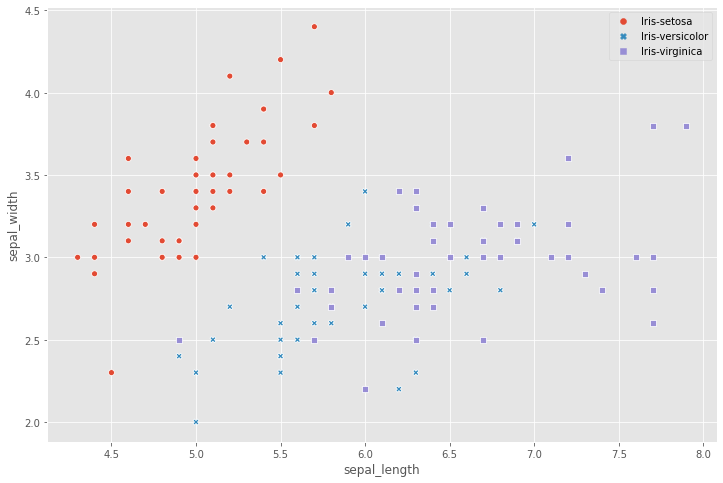

In [9]:
sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width, hue=iris.species.tolist(), style=iris.species.tolist())
plt.show()

In [12]:
#Feature matrix
X = iris.drop('species', axis=1).values

#Target vector
y = iris.species.values

In [14]:
means = X.mean(axis=0)
means

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [15]:
X = X - means
X.mean(axis=0)

array([-3.31586610e-16, -2.60532336e-16,  4.73695157e-16, -9.47390314e-17])

In [17]:
stds = X.std(axis=0)
stds

array([0.82530129, 0.43214658, 1.75852918, 0.76061262])

In [18]:
X = X * (1/stds)
X.std(axis=0)

array([1., 1., 1., 1.])

In [23]:
covariance_matrix = np.cov(X.T)
covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [29]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [30]:
variance_explained = [(ev/sum(eigen_values)) * 100 for ev in eigen_values]
variance_explained

[72.77045209380132, 23.030523267680643, 3.68383195762739, 0.5151926808906402]

In [31]:
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

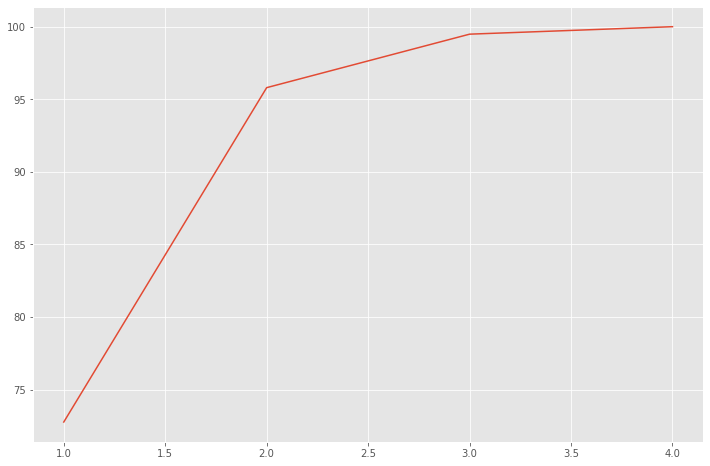

In [33]:
sns.lineplot(x=range(1, len(eigen_values) + 1), y=cumulative_variance_explained)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title()
plt.show()

In [34]:
projection_matrix = eigen_vectors[:, :2]
projection_matrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [36]:
X_pca = X@projection_matrix

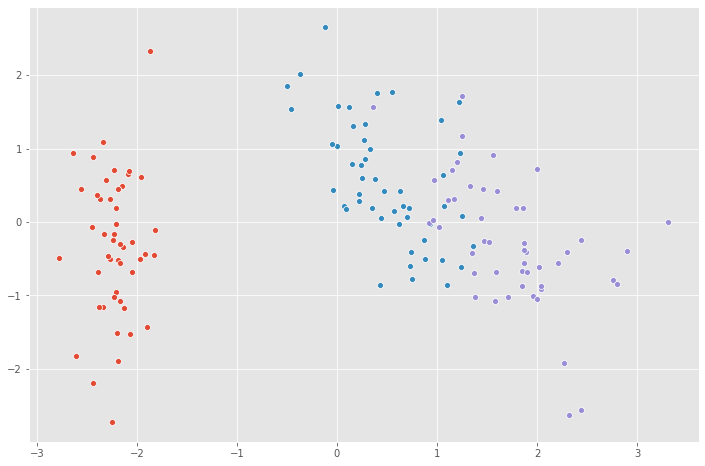

In [38]:
for species in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    sns.scatterplot(X_pca[y==species, 0], X_pca[y==species, 1])